In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?begin_date=20230801&end_date=20230831&station=9414290&product=hourly_height&datum=MLLW&time_zone=lst&units=metric&application=DataAPI_Sample&format=csv')
data.index = data['Date Time']
data.head()

,Date Time,Water Level,Sigma,I,L
Date Time,,,,,
2023-08-20 00:00,2023-08-20 00:00,1.613,0.022,0,0
2023-08-20 01:00,2023-08-20 01:00,1.706,0.021,0,0
2023-08-20 02:00,2023-08-20 02:00,1.681,0.019,0,0
2023-08-20 03:00,2023-08-20 03:00,1.469,0.028,0,0
2023-08-20 04:00,2023-08-20 04:00,1.168,0.026,0,0


In [3]:
water_level = data[' Water Level']

In [4]:
def df_to_X_y(df, window_size=10):
    df_as_np = df.to_numpy()
    X = []
    y = []
    indices = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        indices.append(i+window_size)
        y.append(label)
    return np.array(X), np.array(y), indices
        

In [5]:
WINDOW_SIZE = 10
X, y, indices = df_to_X_y(water_level, WINDOW_SIZE)

In [6]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

2023-09-07 14:11:07.702645: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
predictions = model1.predict(X).flatten()
results = pd.DataFrame(data={'Predictions': predictions, 'Actuals':y})

2023-09-07 14:11:16.598401: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


In [8]:
data['Predicted Water Level'] = None
for i in range(len(y)):
    data.iloc[indices[i], 5] = predictions[i]
data

,Date Time,Water Level,Sigma,I,L,Predicted Water Level
Date Time,,,,,,
2023-08-20 00:00,2023-08-20 00:00,1.613,0.022,0,0,None
2023-08-20 01:00,2023-08-20 01:00,1.706,0.021,0,0,None
2023-08-20 02:00,2023-08-20 02:00,1.681,0.019,0,0,None
2023-08-20 03:00,2023-08-20 03:00,1.469,0.028,0,0,None
2023-08-20 04:00,2023-08-20 04:00,1.168,0.026,0,0,None
...,...,...,...,...,...,...
2023-08-25 19:00,2023-08-25 19:00,1.820,0.022,0,0,1.750592
2023-08-25 20:00,2023-08-25 20:00,1.558,0.023,0,0,1.545098
2023-08-25 21:00,2023-08-25 21:00,1.170,0.019,0,0,1.231024


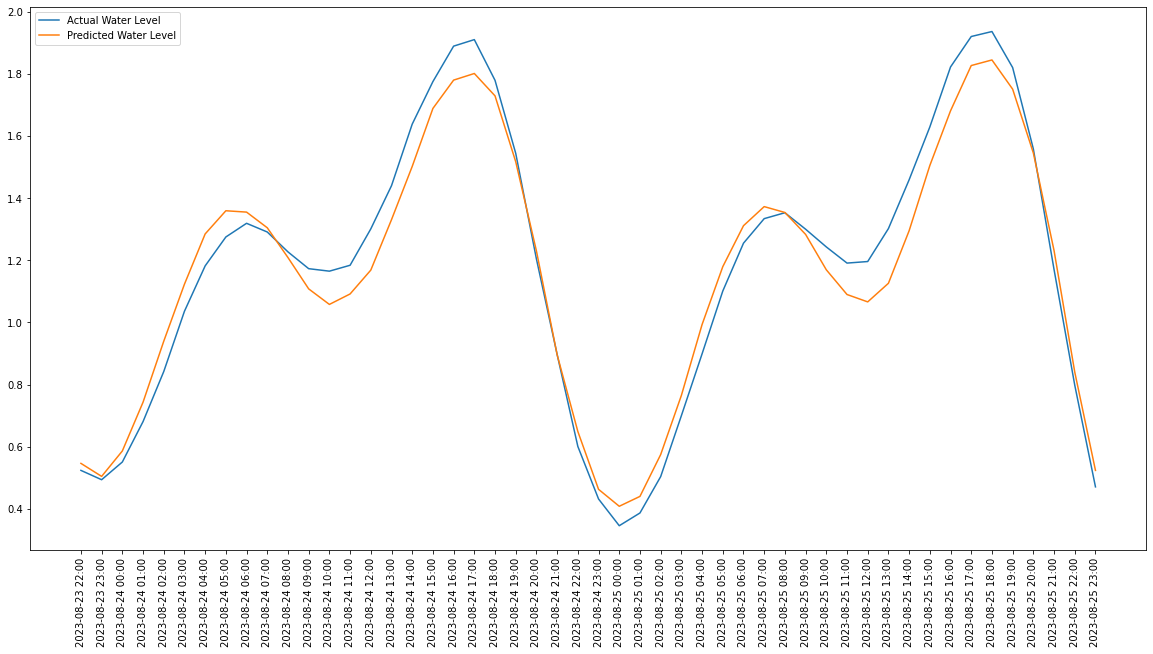

In [9]:
OFFSSET = 50
predicted_water_level = data['Predicted Water Level']
plt.figure(figsize=(20,10))
plt.plot(water_level[-OFFSSET:], label='Actual Water Level')
plt.plot(predicted_water_level[-OFFSSET:], label='Predicted Water Level')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()